# 2022-10-05
    2022-10-06
    new tain PACG + POAG, and with fixed val list. to compare pix2pix and keypoints reuslts.f
    
    img_list.txt
    1342399_L_merged.jpg
    1310627_R_merged.jpg
    4475746_R_merged.jpg
    0268212_merged.jpg
    1935572_L_merged.jpg
    1545959_merged.jpg
    3602493_merged.jpg
    3407174_merged.jpg
    0849116_L_merged.jpg
    5012674_merged.jpg
    2907064_L_merged.jpg
    4154541_merged.jpg
    3310379_merged.jpg
    3001867_merged.jpg
    1935572_merged.jpg
    4154541_L_merged.jpg
    2815145_L_merged.jpg
    3806920_merged.jpg
    3602493_L_merged.jpg
    3321454_L_merged.jpg
    2815145_merged.jpg
    3167782_merged.jpg
    2216002_R_merged.jpg
    2987599_merged.jpg
    2216002_merged.jpg
    2376139_R_merged.jpg
    2099276_merged.jpg
    
    create NEW CSV for taining and fixed val split. [FV_image_value_1005_train.csv , FV_image_value_1005_val.csv ]
    

# 2022-0927 
    new 76 tatal FV_val, we should retrain the model and see.

## 2022-09-14

    well, we come here again for testing regression model for value/point from image.
    

## 2022-09-14 2
    Seems fine, let's modify it to work with PCGA
    
    
    CSV formate with 14 value
    
    filename	x1	y1	x2	y2	x3	y3	x4	y4	x5	y5	x6	y6	x7	y7	x8	y8	x9	y9	x10	y10	x11	y11	x12	y12	x13	y13	x14	y14
00000.jpg	51	51	127	60	169	65	203	52	68	77	85	75	110	82	160	87	171	79	193	84	156	144	92	174	140	180	168	179
00001.jpg	21	20	36	18	57	19	80	25	23	27	34	26	40	28	59	30	68	30	78	33	43	46	31	61	45	66	60	65
00002.jpg	23	116	39	83	47	57	56	19	36	115	40	96	47	87	59	60	59	41	62	31	91	86	106	122	115	100	121	81


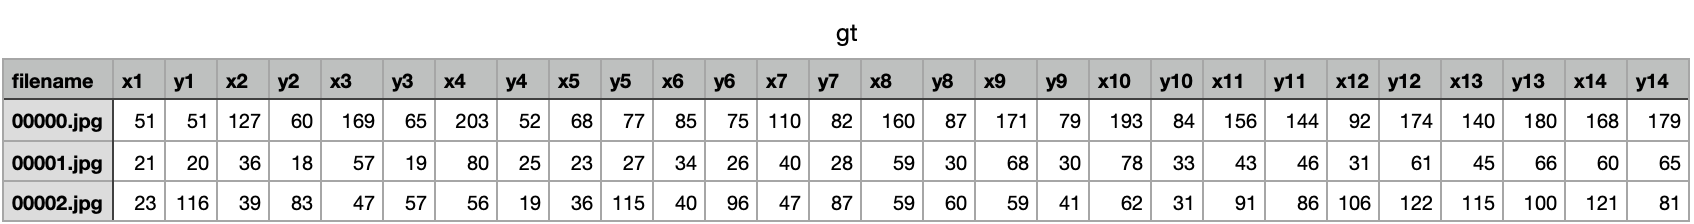


    * Create same from of the csv. DONE
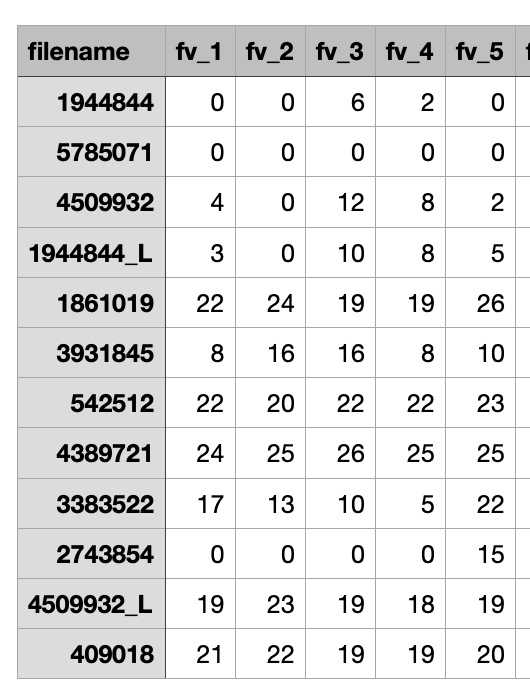
    
    

## 2022-09-15
    * add model Visualization
    * add grandent activation map
    

## keypoints regression



### Load and preprocess data

Script `get_data.py` unpacks data — images and labelled points. 6000 images are located in `images` folder and keypoint coordinates are in `gt.csv` file. Run the cell below to unpack data.

In [1]:
# from get_data import unpack
# unpack('facial-keypoints-data.zip')

Now you have to read `gt.csv` file and images from `images` dir. File `gt.csv` contains header and ground truth points for every image in `images` folder. It has 29 columns. First column is a filename and next 28 columns are `x` and `y` coordinates for 14 facepoints. We will make following preprocessing:
1. Scale all images to resolution $100 \times 100$ pixels.
2. Scale all coordinates to range $[-0.5; 0.5]$. To obtain that, divide all x's by width (or number of columns) of image, and divide all y's by height (or number of rows) of image and subtract 0.5 from all values.

Function `load_imgs_and_keypoint` should return a tuple of two numpy arrays: `imgs` of shape `(N, 100, 100, 3)`, where `N` is the number of images and `points` of shape `(N, 28)`.

In [2]:
import os
# set log level should be before import tf, to skip "TF_ENABLE_AUTO_MIXED_PRECISION has no effect"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# INFO messages are not printed.
# This must be run before loading other modules.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
### Useful routines for preparing data
import numpy as np
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize
import csv, cv2
# import os
import skimage


import tensorflow as tf # replace all keras layers

In [4]:
# take 3000 image to memory take 10mins, we should write it into tf.data 

In [5]:
%%time

img_size = 1024 # 224 #500 #50
#num_imgs = 2 #300 #3000 # take [3000:2*3000]  leave head-3000

# def load_imgs_and_keypoints(dirname='PCGA-points'):
#     # Write your code for loading images and points here
    
#     points_dict={}
#     with open("./FV_image_value_0927.csv", 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         count=0
#         for row in csvreader:
#             if count==0:
#                 count+=1
#                 continue
#             points_dict[row[0]]= [int(x) for x in row[1:]]
#     print("Dict created")
    
    
#     folder = "/home/u3148947/data/PACG_0927/PACG_fovea_centered_fundus_crop/"
#     images = []
#     points = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
#         print(filename, os.path.join(folder,filename))
#         img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
#         cols,rows,_ = img.shape                                                          # org image 
#         if img is not None:
#             images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
#             filename = os.path.splitext(filename)[0]                                     # without ".jpg"
#             point = points_dict[filename]
#             print("  check---", point, img.shape)
            
# #             for i in range(52):                                                        # fv do need rescal
# #                 """ convert xy to [-0.5, 0.5]
# #                     why?
# #                 """
# #                 print("  check---", "p14#", i)
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i] = point[2*i]/cols - 0.5
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i+1] = point[2*i+1]/rows - 0.5

#             print("  check---", point)
#             points.append(point)
      
#     images = np.array(images)
#     points = np.array(points)
# #     points = sort_points(points)
#     print(images.shape,points.shape)
    
#     return images, points

# imgs, points = load_imgs_and_keypoints()



def load_imgs_and_keypoints(CSV_name, dirname='PCGA-points'):
    # Write your code for loading images and points here
    # sources [10-05]
    FV_img = "POACG_crop"                          #視野
    FV_val = "POACG_FV_vaule"                    #視野值
    FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
    FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

    data_Dir = "~/data/PACG_data_20221005/"
    data_Dir = "/home/u3148947/data/PACG_data_20221005/"

    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
    print("Dict created")
#     print(points_dict['0268212'])
#     print(points_dict.keys())
    filename_list = [name + ".jpg" for name in points_dict.keys()]
    
    folder = "/home/u3148947/data/PACG_data_20221005/POACG_crop"
    images = []
    points = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
    for filename in filename_list:                                                       # name from list to make sure all is fixed
        #print("  check---", filename, os.path.join(folder,filename))
        img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
        #print("  check---", "img read")
        cols,rows,_ = img.shape                                                          # org image 
        
        if img is not None:
            images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
            #print("  check---", "image append")
            filename = os.path.splitext(filename)[0]                                     # without ".jpg"
            #print("  check---", "filename rm .jpg")
            point = points_dict[filename]
            #print("  check---", point, img.shape)
            
#             for i in range(52):                                                        # fv do need rescal
#                 """ convert xy to [-0.5, 0.5]
#                     why?
#                 """
#                 print("  check---", "p14#", i)
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i] = point[2*i]/cols - 0.5
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i+1] = point[2*i+1]/rows - 0.5

            #print("  check---", point)
            points.append(point)
      
    images = np.array(images)
    points = np.array(points)
#     points = sort_points(points)
    print(images.shape,points.shape)
    
    return images, points


# NoFixesFhuffle
# imgs, points = load_imgs_and_keypoints("FV_image_value_1005.csv")

#
imgs_train, points_train = load_imgs_and_keypoints("FV_image_value_1005_train.csv")
imgs_val, points_val = load_imgs_and_keypoints("FV_image_value_1005_val.csv")




Dict created
(244, 1024, 1024, 3) (244, 52)
Dict created
(27, 1024, 1024, 3) (27, 52)
CPU times: user 47.3 s, sys: 32.4 s, total: 1min 19s
Wall time: 33.8 s


## tfds shuffle 
    NO we are not use tfda currently!!

In [6]:
# tfds shuffle 
# train_all = tf.data.Dataset.zip((imgs_train, points_train))
# train_all = train_all.shuffle(50, reshuffle_each_iteration=True)

In [7]:
!ls /home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg

ls: cannot access '/home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg': No such file or directory


In [8]:
!ls -la /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg

-rw-r--r-- 1 u3148947 TRI108216 199625 Sep  8 10:57 /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg


In [9]:
# check point normaization
0/94 - 0.5

-0.5

In [10]:
# Example of output
%matplotlib inline
from skimage.io import imshow
imshow(imgs[0])
points[0]

# imshow(imgs_train[0])
# points_train[0]

NameError: name 'imgs' is not defined

### Visualize data

Let's prepare a function to visualize points on image. Such function obtains two arguments: an image and a vector of points' coordinates and draws points on image (just like first image in this notebook).

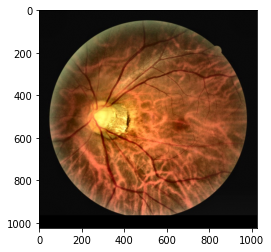

In [11]:
import matplotlib.pyplot as plt
# Circle may be useful for drawing points on face
# See matplotlib documentation for more info
from matplotlib.patches import Circle

def visualize_points(img, points):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(14):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))
    
# visualize_points(imgs[1], points[1])
visualize_points(imgs_train[1], points_train[1])

In [12]:
def visualize_points1(img, points,j):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(j,j+1):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))

### Train/val split

Run the following code to obtain train/validation split for training neural network.

In [13]:
# comment ! IF use fixed val_list

from sklearn.model_selection import train_test_split
imgs_train, imgs_val, points_train, points_val = train_test_split(imgs, points, random_state=42, test_size=0.1)

NameError: name 'imgs' is not defined

### Simple data augmentation

For better training we will use simple data augmentation — flipping an image and points. Implement function flip_img which flips an image and its' points. Make sure that points are flipped correctly! For instance, points on right eye now should be points on left eye (i.e. you have to mirror coordinates and swap corresponding points on the left and right sides of the face). VIsualize an example of original and flipped image.

For correct NN training, the augmented photos should have the facial keypoints listed in the same order. The 14 keypoints are present in the original dataset in the below order. When the image is flipped, we need to invert the x-coordinate of the point, as well as place in on the opposite side of the face. 

0: left eyebrow, outer

1: left eyebrow, inner

2: right eyebrow, inner

3: right eyebrow, outer

4: left eye, outer

5: left eye, center

6: left eye, inner

7: right eye, inner

8: right eye, center

9: right eye, outer

10: nose center

11: mouth, left

12: mouth, center 

13: mouth, right

In [ ]:
len(imgs_train)

In [ ]:
len(imgs_val)

### this x.y location flip is not working for FV-value, SO WE SKIP THIS AUG.

    array([17, 13, 10,  5, 22, 25, 21, 17, 18,  8, 16, 23, 23, 11,  2, 18, 20,
       21, 18, 20, 25,  0,  7,  0, 22, 29, 24, 26, 28, 28, 29, 27,  0, 25,
       26, 29, 29, 29, 28, 26, 25, 24, 25, 26, 26, 25, 28, 30, 28, 26, 26,
       24])
       
       to
       
       array([-21.,  17., -22.,  25., -10.,   5., -17.,  13., -18.,  20., -20.,
        21.,  -2.,  18., -23.,  11., -16.,  23., -18.,   8., -25.,   0.,
       -24.,  26., -22.,  29.,  -7.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])


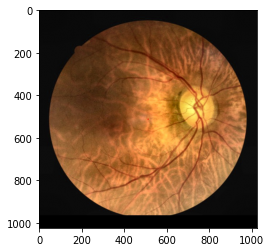

In [14]:
def flip_img(img, points):
    img_flip = img[:, ::-1]
    points_flip = np.zeros(points.shape)
    flip_indices = [3,2,1,0,9,8,7,6,5,4,10,13,12,11]
    for i in range(14):
        points_flip[2*i] = -points[2*flip_indices[i]]
        points_flip[2*i+1] = points[2*flip_indices[i]+1]
    return img_flip, points_flip

# f_img, f_points = flip_img(imgs[6], points[6])
f_img, f_points = flip_img(imgs_train[6], points_train[6])
visualize_points(f_img, f_points)

In [15]:
f_points

array([-11.,   6.,   0.,   7.,   0.,   0.,   0.,   0., -16.,  18., -21.,
        19., -25.,  22., -19.,  18.,  -2.,  18., -20.,  16., -26.,  29.,
       -16.,   0., -24.,  20., -28.,  26.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

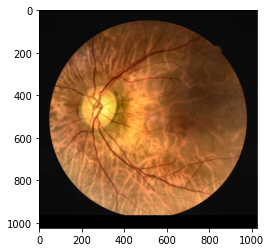

In [16]:
visualize_points(imgs_train[6], points_train[6])

In [17]:
points_train[6]

array([ 0,  0,  0,  0,  0,  7, 11,  6, 20, 16,  2, 18, 19, 18, 25, 22, 21,
       19, 16, 18, 26, 29, 28, 26, 24, 20, 16,  0, 27, 30, 28, 28, 24, 23,
       14, 24, 26, 28, 29, 28, 23, 14, 22, 26, 25, 23, 18, 17, 24, 25, 21,
        9])

Time to augment our training sample. Apply flip to every image in training sample. As a result you should obtain two arrays: `aug_imgs_train` and `aug_points_train` which contain original images and points along with flipped ones.

In [18]:
aug_imgs_train = []
aug_points_train = []

for i in range(imgs_train.shape[0]):
    img_flip, points_flip = flip_img(imgs_train[i],points_train[i])
    aug_imgs_train.append(imgs_train[i])
    aug_imgs_train.append(img_flip)
    aug_points_train.append(points_train[i])
    aug_points_train.append(points_flip)

aug_imgs_train = np.array(aug_imgs_train)
aug_points_train = np.array(aug_points_train)
print(imgs_train.shape, points_train.shape)
print(aug_imgs_train.shape, aug_points_train.shape)

(244, 1024, 1024, 3) (244, 52)
(488, 1024, 1024, 3) (488, 52)


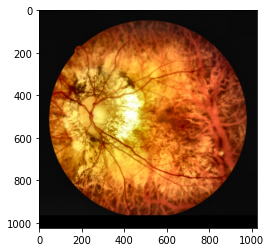

In [19]:
visualize_points1(aug_imgs_train[5], aug_points_train[5],1)

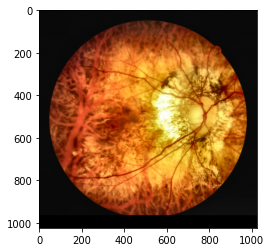

In [20]:
visualize_points1(aug_imgs_train[4], aug_points_train[4],1)

### Network architecture and training

Now let's define neural network regressor. It will have 28 outputs, 2 numbers per point. The precise architecture is up to you. We recommend to add 2-3 (`Conv2D` + `MaxPooling2D`) pairs, then `Flatten` and 2-3 `Dense` layers. Don't forget about ReLU activations. We also recommend to add `Dropout` to every `Dense` layer (with p from 0.2 to 0.5) to prevent overfitting.


In [21]:
# # from keras.models import Sequential
# # from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# # from keras.layers.advanced_activations import LeakyReLU
# # from keras.initializers import glorot_uniform


# # chage to tf.keras.layers. and tf.keras.layers.advanced_activations. tf.keras.initializers.

# model = tf.keras.Sequential(name="KPR-model101")

# model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape=(img_size, img_size, 3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(32, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(64, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Dropout(0.25))  

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

# model.add(tf.keras.layers.Dropout(0.5)) 

# model.add(tf.keras.layers.Dense(64,kernel_initializer=tf.keras.initializers.glorot_uniform()))
# model.add(tf.keras.layers.LeakyReLU(alpha=0))

# model.add(tf.keras.layers.Dense(52,kernel_initializer=tf.keras.initializers.glorot_uniform())) #28 -> 52


In [22]:
NUM_KEYPOINTS = 52
IMG_SIZE = img_size

# def get_model():
#     # Load the pre-trained weights of MobileNetV2 and freeze the weights
#     backbone = tf.keras.applications.MobileNetV2(
#         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
#     )
#     backbone.trainable = False

#     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
#     x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
#     x = backbone(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
#     )(x)
#     outputs = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
#     )(x)

#     return tf.keras.Model(inputs, outputs, name="keypoint_detector")


def get_model():
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = tf.keras.applications.DenseNet201(
        weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    backbone.trainable = False

    inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
    x = tf.keras.applications.densenet.preprocess_input(inputs)
    x = backbone(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
    )(x)
    outputs = tf.keras.layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
    )(x)
    
    # For fix the final output shape is (32, 26, 26, 52) not same as (batch, 52)
    outputs = tf.keras.layers.Flatten()(outputs)
    outputs = tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    outputs = tf.keras.layers.LeakyReLU(alpha=0.1)(outputs)
    outputs = tf.keras.layers.Dense(NUM_KEYPOINTS,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    
    return tf.keras.Model(inputs, outputs, name="KPR-model-kerasApp")

model = get_model()

In [23]:
# model Visualization

# from tf.keras.utils import plot_model
# tf.keras.utils.plot_model(model, to_file='KPR-model-kerasApp_1005.png')

In [24]:
model.summary()

Model: "KPR-model-kerasApp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1024, 1024, 3)]   0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 1024, 1024, 3)     0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 1024, 1024, 3)     0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 1024, 1024, 3)     0         
_________________________________________________________________
densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 1920)      0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 28, 28, 52) 

    Model: "KPR-model-kerasApp"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_6 (InputLayer)         [(None, 1024, 1024, 3)]   0         
    _________________________________________________________________
    tf.math.truediv_4 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.nn.bias_add_2 (TFOpLambda (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.math.truediv_5 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
    _________________________________________________________________
    dropout_6 (Dropout)          (None, 32, 32, 1920)      0         
    _________________________________________________________________
    separable_conv2d_4 (Separabl (None, 28, 28, 52)        147892    
    _________________________________________________________________
    separable_conv2d_5 (Separabl (None, 26, 26, 52)        3224      
    =================================================================
    Total params: 18,473,100
    Trainable params: 151,116
    Non-trainable params: 18,321,984
    _________________________________________________________________



    Model: "KPR-model-kerasApp"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    input_2 (InputLayer)         [(None, 1024, 1024, 3)]   0         
    _________________________________________________________________
    tf.math.truediv (TFOpLambda) (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.nn.bias_add (TFOpLambda)  (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    tf.math.truediv_1 (TFOpLambd (None, 1024, 1024, 3)     0         
    _________________________________________________________________
    densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
    _________________________________________________________________
    dropout_4 (Dropout)          (None, 32, 32, 1920)      0         
    _________________________________________________________________
    separable_conv2d (SeparableC (None, 28, 28, 52)        147892    
    _________________________________________________________________
    separable_conv2d_1 (Separabl (None, 26, 26, 52)        3224      
    _________________________________________________________________
    flatten_1 (Flatten)          (None, 35152)             0         
    _________________________________________________________________
    dense_3 (Dense)              (None, 128)               4499584   
    _________________________________________________________________
    leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
    _________________________________________________________________
    dense_4 (Dense)              (None, 52)                6708      
    =================================================================
    Total params: 22,979,392
    Trainable params: 4,657,408
    Non-trainable params: 18,321,984
    _________________________________________________________________


    Model: "KPR-model101"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_12 (Conv2D)           (None, 1024, 1024, 16)    448       
    _________________________________________________________________
    leaky_re_lu_20 (LeakyReLU)   (None, 1024, 1024, 16)    0         
    _________________________________________________________________
    max_pooling2d_12 (MaxPooling (None, 512, 512, 16)      0         
    _________________________________________________________________
    dropout_25 (Dropout)         (None, 512, 512, 16)      0         
    _________________________________________________________________
    conv2d_13 (Conv2D)           (None, 512, 512, 32)      4640      
    _________________________________________________________________
    leaky_re_lu_21 (LeakyReLU)   (None, 512, 512, 32)      0         
    _________________________________________________________________
    max_pooling2d_13 (MaxPooling (None, 256, 256, 32)      0         
    _________________________________________________________________
    dropout_26 (Dropout)         (None, 256, 256, 32)      0         
    _________________________________________________________________
    conv2d_14 (Conv2D)           (None, 256, 256, 64)      18496     
    _________________________________________________________________
    leaky_re_lu_22 (LeakyReLU)   (None, 256, 256, 64)      0         
    _________________________________________________________________
    max_pooling2d_14 (MaxPooling (None, 128, 128, 64)      0         
    _________________________________________________________________
    dropout_27 (Dropout)         (None, 128, 128, 64)      0         
    _________________________________________________________________
    flatten_4 (Flatten)          (None, 1048576)           0         
    _________________________________________________________________
    dense_14 (Dense)             (None, 128)               134217856 
    _________________________________________________________________
    leaky_re_lu_23 (LeakyReLU)   (None, 128)               0         
    _________________________________________________________________
    dropout_28 (Dropout)         (None, 128)               0         
    _________________________________________________________________
    dense_15 (Dense)             (None, 64)                8256      
    _________________________________________________________________
    leaky_re_lu_24 (LeakyReLU)   (None, 64)                0         
    _________________________________________________________________
    dense_16 (Dense)             (None, 52)                3380      
    =================================================================
    Total params: 134,253,076
    Trainable params: 134,253,076
    Non-trainable params: 0
    _________________________________________________________________

Time to train! Since we are training a regressor, make sure that you use mean squared error (mse) as loss. Feel free to experiment with optimization method (SGD, Adam, etc.) and its' parameters.

In [25]:
# ModelCheckpoint can be used for saving model during training.
# Saved models are useful for finetuning your model 
# See keras documentation for more info
# from tf.keras.callbacks import ModelCheckpoint
# from tf.keras.optimizers import SGD, Adam

# change to
# tf.keras.callbacks.ModelCheckpoint
# tf.keras.optimizers.SGD
# tf.keras.optimizers.Adam

# Choose optimizer, compile model and run training
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics=['mean_squared_error', 'mean_absolute_error', tf.keras.metrics.RootMeanSquaredError()])

In [26]:
BATCH_SIZE = 2
EPOCHS = 200

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

#best_model = f'ZhuYin/best_model/Zhuyin_encoder_cleanGT_nNet_ckpt/' + model_name + "_" + str(img_size) + 'x' + str(img_size) + '_' + str(MULTI_BATCH_SIZE) + '_{epoch:04}' # + {epoch} for save every best ckpt models
best_model = "best_my_model_1006_bs2_p0_e200_FixedShuffle_/kpg_ckpt"
save_best_model = tf.keras.callbacks.ModelCheckpoint(filepath=best_model, monitor='val_loss', save_weights_only=True, save_best_only=True, mode='auto', verbose=1)

# lr_schedul = tf.keras.callbacks.LearningRateScheduler(CosineDecayCLRWarmUpLSW_2)


callbacks=[early_stop, 
           save_best_model, 
           #tensorboard_callback, 
           #lr_schedul, 
           #PrintLR(), # teake 4~5 sec per epoch!!!!
          ] # evl_img_callback],

# callbacks=callbacks

In [77]:
%%time

hist = model.fit(
    #aug_imgs_train, aug_points_train,          # note that: x,y flip is not work for FV-value 
    imgs_train, points_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(imgs_val, points_val),
    shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
    verbose=1,
    callbacks=callbacks,
)

Epoch 1/200
122/122 [==============================] - 49s 224ms/step - loss: 128.2230 - mean_squared_error: 128.2230 - mean_absolute_error: 8.8206 - root_mean_squared_error: 11.3236 - val_loss: 115.4804 - val_mean_squared_error: 115.4804 - val_mean_absolute_error: 9.2411 - val_root_mean_squared_error: 10.7462

Epoch 00001: val_loss improved from inf to 115.48037, saving model to best_my_model_1006_bs2_p0_e200_FixedShuffle_/kpg_ckpt
Epoch 2/200
122/122 [==============================] - 9s 77ms/step - loss: 110.8540 - mean_squared_error: 110.8540 - mean_absolute_error: 8.3876 - root_mean_squared_error: 10.5287 - val_loss: 105.4350 - val_mean_squared_error: 105.4350 - val_mean_absolute_error: 7.9585 - val_root_mean_squared_error: 10.2682

Epoch 00002: val_loss improved from 115.48037 to 105.43504, saving model to best_my_model_1006_bs2_p0_e200_FixedShuffle_/kpg_ckpt
Epoch 3/200
122/122 [==============================] - 22s 180ms/step - loss: 103.8025 - mean_squared_error: 103.8025 - me

In [78]:
_1006_bs32_p0_e200_
Epoch 00199: val_loss did not improve from 55.48315
Epoch 200/200
8/8 [==============================] - 6s 802ms/step - loss: 60.3071 - mean_squared_error: 60.3071 - mean_absolute_error: 6.0912 - root_mean_squared_error: 7.7658 - val_loss: 91.1561 - val_mean_squared_error: 91.1561 - val_mean_absolute_error: 6.7619 - val_root_mean_squared_error: 9.5476
CPU times: user 6min 57s, sys: 2min 40s, total: 9min 37s
Wall time: 23min 7s
    

_1006_bs2_p0_e200_
Epoch 00199: val_loss did not improve from 51.45002
Epoch 200/200
122/122 [==============================] - 9s 71ms/step - loss: 98.8630 - mean_squared_error: 98.8630 - mean_absolute_error: 7.9771 - root_mean_squared_error: 9.9430 - val_loss: 57.9226 - val_mean_squared_error: 57.9226 - val_mean_absolute_error: 6.1787 - val_root_mean_squared_error: 7.6107
CPU times: user 28min 23s, sys: 4min 7s, total: 32min 30s
Wall time: 30min 14s 

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2149835937.py, line 2)

In [ ]:
# model.save_weights('_1006_bs32_p0_e200_my_model_weights_1006.h5')

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [ ]:
# model.load_weights('my_model_weights.h5')

$\color{color-code}{your-text-here}$

<font color=#0fb503>other color</font>

# Ploting

In [ ]:
"因為loss是用mse算出 因此兩者相同"

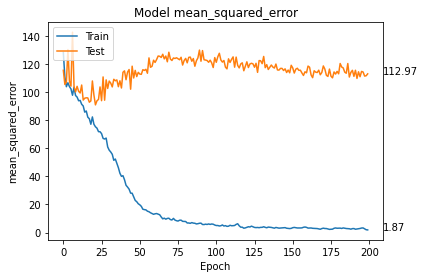

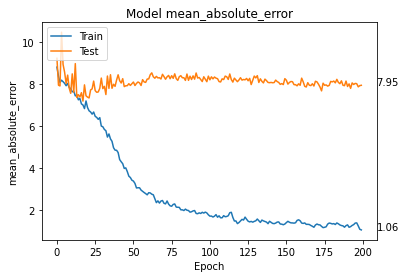

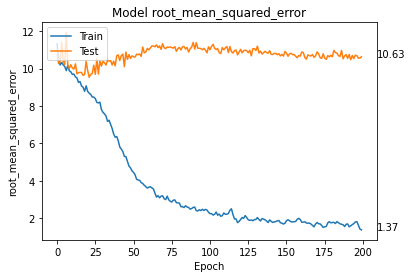

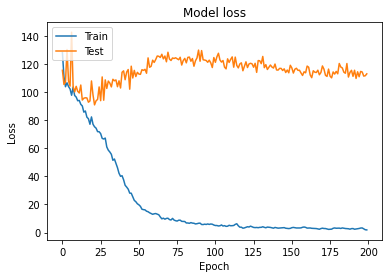

In [79]:
import matplotlib.pyplot as plt

history = hist

# mse
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_squared_error']
vr=history.history['val_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_mean_squared_error.jpg', dpi=150)
plt.show()


# mae
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_absolute_error']
vr=history.history['val_mean_absolute_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_mean_absolute_error.jpg', dpi=150)
plt.show()


# RMSE root_mean_squared_error
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

tr=history.history['root_mean_squared_error']
vr=history.history['val_root_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('KPR-model_root_mean_squared_error.jpg', dpi=150)
plt.show()


# loss = mean_squared_error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [80]:
tr[-1]

1.3658288717269897

# Visualize results for PCGA

### Reload trained weight

In [27]:
#restore_model = tf.keras.models.load_model('my_model_weights.h5')

# # reload the weights not the load_model !
# model.load_weights('my_model_weights.h5')

# realod from ckpt save_weight_only, "best_my_model_1005/kpg_ckpt"


# model.load_weights('_1006_bs32_p0_e200_my_model_weights_1006.h5')
model.load_weights(best_model)


# model.load_weights("best_my_model_1006_bs2_p0_e200/kpg_ckpt")

### Predict validation images

In [28]:
val_points_pred = model.predict(imgs_val) # imgs_train imgs_val

In [29]:
val_points_pred

array([[15.651974, 15.52413 , 14.959843, ..., 23.836582, 22.410767,
        20.089651],
       [16.03635 , 15.55244 , 15.307491, ..., 21.70211 , 20.393639,
        19.259743],
       [20.721428, 21.02425 , 18.92024 , ..., 25.705986, 27.722805,
        28.227364],
       ...,
       [22.960173, 24.433855, 20.425825, ..., 27.325306, 30.227928,
        29.7133  ],
       [25.132982, 25.168846, 26.909147, ..., 30.653738, 28.681004,
        25.43051 ],
       [19.331118, 18.58864 , 18.052374, ..., 24.820213, 25.747467,
        24.821325]], dtype=float32)

In [30]:
points_val

array([[ 3,  8, 18, ..., 27, 25, 24],
       [20, 11, 16, ..., 21, 19, 19],
       [19, 18, 22, ..., 25, 24, 19],
       ...,
       [10, 18, 20, ..., 23, 24, 27],
       [28, 28, 29, ..., 29, 23, 25],
       [24, 20, 23, ..., 23, 22, 28]])

## Restore FV-value back to FV_img (gray scale map) 
    [2022-09-29]
    FV list rows number
    
    4
    6
    8
    8
    8
    8
    6
    4

    * reshape 52 to [8, 8] pad zeros [OK]
    * reshape [8,8] to [640, 640] and pad with Interpolation [NO, better keep it as it is. even for pix2pix training.]
    * plot as gray image [OK]

In [ ]:
# check one fv_value
print(f"52 value: \n\t{points_val[0]}")
print(f"shape 1: \n\t{points_val[0].shape}")
print(f"length 1: \n\t{len(points_val[0])}")
# points_val[0]

In [ ]:
np.__version__

In [ ]:
# points_val[0].reshape(8,8)

In [ ]:
# np.reshape(points_val[0], (8,8))

In [ ]:
# check how to pad zero to row

sampl_arr_1 = points_val[0]
print(sampl_arr_1[:4])

sampl_arr_1 = np.pad(sampl_arr_1[:4], ((2, 2)), 'constant',constant_values=(0))
print(sampl_arr_1)

In [31]:
def reshape_FV_value_list(fv_list):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]
#     gt_ = [
#      23 21 24 18
#      24 24 25 20 23 27
#      26 27 22 25 24 26 26 23 
#      29 23 27 28  0 27 26 25 
#      25  0 28 28 29 29 29 28 
#      30 30 30 29 26 29 28 27 
#      29 27 23 27 28 27
#      25 27 24 24]
    
#     for i, idx in enumerate(rank):
#         print(f"rank: {i} {idx}")
        
#         arr_idx_1 = np.pad(sampl_arr_1[i:idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
        
#         print(arr_idx_1)
    
    tmp_arr = []
    steps = 0
    h_rows = 4
    for i, idx in enumerate(rank):
        #print(f"rank: {i} {idx}")
        
#         # 8-rows
#         if i == 0 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[0:idx], ((2, 2)), 'constant',constant_values=(0))
#         if i == 1 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[4:4+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 2 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[10:10+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 3 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[18:18+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 4 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[26:26+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 5 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[34:34+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 6 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[42:42+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 7 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[48:48+idx], ((2, 2)), 'constant',constant_values=(0))


        # 8-rows in onece, half-rows = 4
        arr_idx_1 = np.pad(fv_list[steps : steps + idx], ((h_rows - int(idx/2), h_rows - int(idx/2))), 'constant',constant_values=(0))
        
        steps += idx
            
        tmp_arr.append(arr_idx_1)    
        
        #print(arr_idx_1)
    #print(tmp_arr)
    return np.vstack(tmp_arr)

def reshape_FV_value_to_org_list(fv_list):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]

    
    tmp_arr = []
    steps = 0
    h_rows = 4
    for i, idx in enumerate(rank):
        #print(f"rank: {i} {idx}")
        
        # 8-rows in onece, half-rows = 4
        arr_idx_1 = fv_list[steps : steps + idx]
        
        steps += idx
            
        tmp_arr.append(arr_idx_1)    
        
        #print(arr_idx_1)
    #print(tmp_arr)
    return tmp_arr

In [ ]:
reshape_fv = reshape_FV_value_list(points_val[0])

In [ ]:
plt.imshow(reshape_fv, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:
reshape_fv_pred = reshape_FV_value_list(val_points_pred[0])

In [ ]:
plt.imshow(reshape_fv_pred, interpolation='nearest', cmap="gray")
plt.show()

### Check val_FV_value_list name is in the right ordered


In [32]:
""" read in list
imgs_train, points_train 
imgs_val, points_val
"""

def get_points_dict(CSV_name):
    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
            
    return points_dict     
            
val_points_dict = get_points_dict("FV_image_value_1005_val.csv")


print(val_points_dict.keys())
print()
print(list(val_points_dict.items())[0])

print("val length: ", len(val_points_dict))

dict_keys(['3602493_L', '2099276', '3602493', '1545959', '3167782', '2216002_R', '5012674', '2907064_L', '3310379', '2815145_L', '0268212', '1935572', '1310627_R', '1342399_L', '4154541_L', '3407174', '3806920', '2987599', '0849116_L', '4475746_R', '2216002', '4154541', '3321454_L', '2815145', '2376139_R', '3001867', '1935572_L'])

('3602493_L', [3, 8, 18, 10, 24, 23, 3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26, 23, 25, 14, 28, 30, 29, 28, 25, 20, 29, 0, 10, 31, 31, 29, 28, 23, 27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25, 24])
val length:  27


In [96]:
# the order in CSV and val_point is correct #
print("check read from CSV [0]:\n", val_points_dict['3602493_L'], type(val_points_dict['3602493_L'])) # list object
print("check read from val [0]:\n", points_val[0], type(points_val[0]))                               # np.ndarray



check read from CSV [0]:
 [3, 8, 18, 10, 24, 23, 3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26, 23, 25, 14, 28, 30, 29, 28, 25, 20, 29, 0, 10, 31, 31, 29, 28, 23, 27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25, 24] <class 'list'>
check read from val [0]:
 [21  0 23 26 22 25 21 25 28 28 20 27 29 29 28 29 27 28 24 29 31 31 29 27
 26 27 23 29 32 32 30 29  0 27 29 30 33 34 33 31 29 24 32 32 31 30 31 31
 28 30 30 28] <class 'numpy.ndarray'>


#### Also check val_points_pred

In [ ]:
print("check read from prd [0]:\n", val_points_pred[0], type(val_points_pred[0]))        


In [ ]:
reshape_fv = reshape_FV_value_to_org_list(points_val[0])
reshape_fv_pred = reshape_FV_value_to_org_list(val_points_pred[0])

print("check read from val [0]:\n", reshape_fv)
print("check read from prd [0]:\n", reshape_fv_pred)

In [ ]:
reshape_fv_pred

In [ ]:
val_points_pred[0] #ndarray
# len(val_points_pred[0])

In [ ]:
# try np to np.savetext
tmp_np = np.array(val_points_pred[0])
# tmp_np.shape
np.savetxt("test_np_savetext.txt", tmp_np, delimiter=',', fmt='%s') # only %s works for non-same shape arrays

In [ ]:
!cat test_np_savetext.txt

In [ ]:
# try np to np.savetext
tmp_np = np.array(reshape_fv_pred)
# tmp_np.shape
np.savetxt("test_np_savetext.txt", tmp_np, delimiter=',', fmt='%s') # only %s works for non-same shape arrays

In [ ]:
!cat test_np_savetext.txt

In [33]:
# try list array to txt



def write_reshape_FV_value_to_txt(fv_list, filename):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]

    
    tmp_arr = []
    steps = 0
    h_rows = 4
    
    with open(filename, "w") as txt_file:
        for i, idx in enumerate(rank):
            #print(f"rank: {i} {idx}")

            # 8-rows in onece, half-rows = 4
            arr_idx_1 = fv_list[steps : steps + idx]

            steps += idx
            for value in arr_idx_1:
                txt_file.write("".join(str(value)) + ",") #tmp_arr.append(arr_idx_1)    
            txt_file.write("\n") #tmp_arr.append(arr_idx_1)  

            #print(arr_idx_1)
        #print(tmp_arr)
        #return tmp_arr



write_reshape_FV_value_to_txt(val_points_pred[0], "test_np_savetext.txt")


In [98]:
!cat test_np_savetext.txt

19.833042,20.07082,15.780192,13.735205,
17.822575,17.191113,14.929387,18.27975,18.619871,20.048367,
14.507273,16.695316,18.047827,19.972082,24.628618,20.1065,19.470007,13.016168,
19.415855,21.86581,22.866173,22.422733,24.890356,21.755081,10.757847,23.493896,
18.054987,26.41189,24.634888,24.18569,28.547354,22.264544,5.684537,27.570107,
16.966747,24.580336,22.243813,28.762728,19.771986,24.42248,23.784248,20.35605,
22.05157,23.297499,25.856316,24.998125,24.271393,19.600758,
26.854513,20.533989,24.168919,24.291082,


### convert pred_FV_value to list

In [99]:
!mkdir _1006_bs32_p0_e200

mkdir: cannot create directory ‘_1006_bs32_p0_e200’: File exists


In [103]:
for item in range(len(val_points_dict)):
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
    filename = "best_my_model_1006_bs2_p0_e200_FixedShuffle_/" + val_points_dict_list[item][0] + ".txt"
    print("check filename:", filename)
  
    # to value.txt
    write_reshape_FV_value_to_txt(val_points_pred[item], filename)

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3602493_L.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2099276.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3602493.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1545959.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3167782.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2216002_R.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/5012674.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2907064_L.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3310379.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2815145_L.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/0268212.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1935572.txt
check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1310627_R.txt
check filename: best_my_model_1006_bs2_p0

## display and save pred_FV_value to image

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3602493_L_predFV.jpg
20.703453 float32 29 int64
MSE : 51.87503305084954
PSNR: 30.64286876518558
SSIM: 0.7920605430457982
20 29


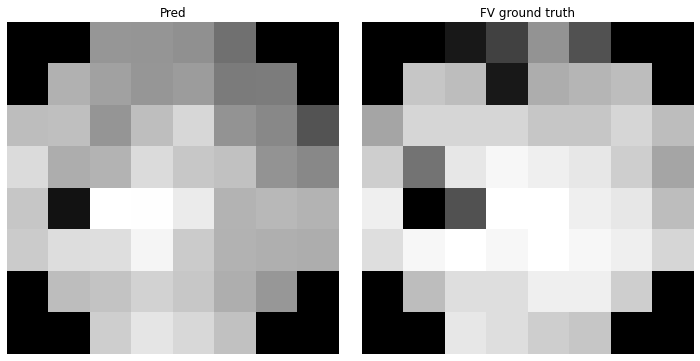

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2099276_predFV.jpg
20.975742 float32 26 int64
MSE : 44.18722861155108
PSNR: 31.755280934502007
SSIM: 0.7744379294436545
20 26


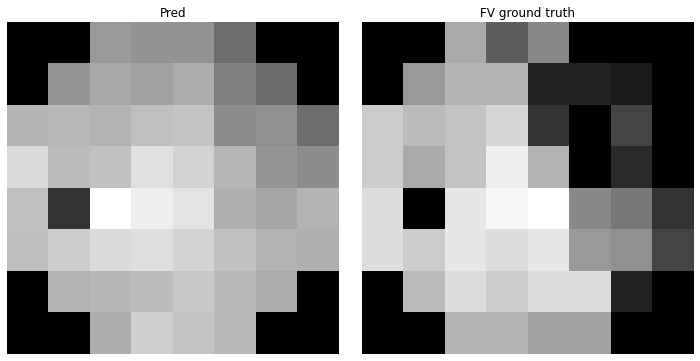

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3602493_predFV.jpg
26.190374 float32 27 int64
MSE : 10.350159897027346
PSNR: 18.080473919299806
SSIM: -0.02679994314143605
26 27


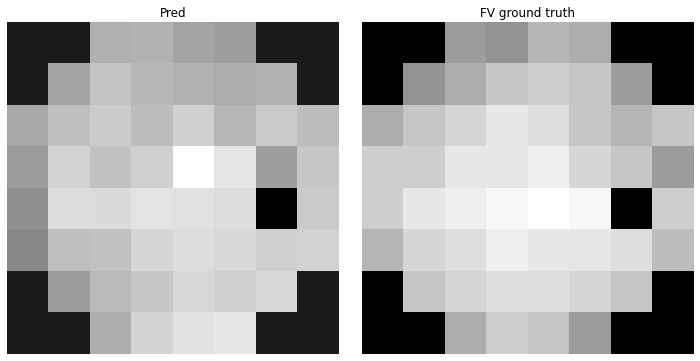

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1545959_predFV.jpg
24.143867 float32 25 int64
MSE : 41.27383080531956
PSNR: 31.528376124180056
SSIM: 0.8892615321335435
24 25


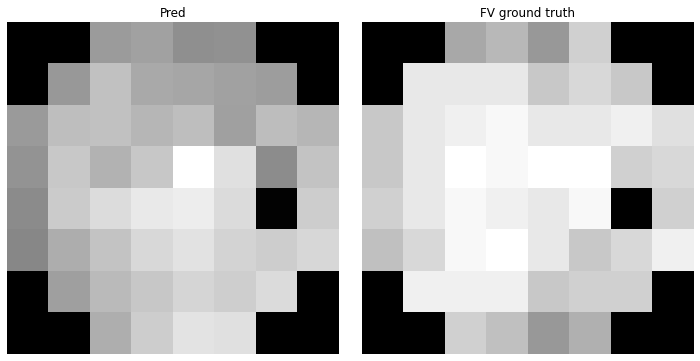

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3167782_predFV.jpg
35.787083 float32 28 int64
MSE : 99.33574605599281
PSNR: 28.44305645771659
SSIM: 0.805329211286999
35 28


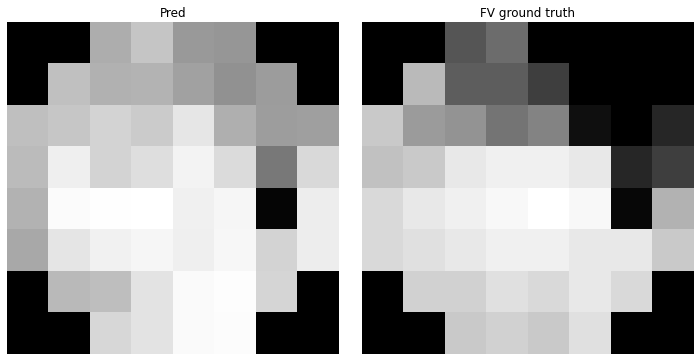

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2216002_R_predFV.jpg
18.892677 float32 31 int64
MSE : 156.5767832590313
PSNR: 25.903232577811195
SSIM: 0.718443463915028
18 31


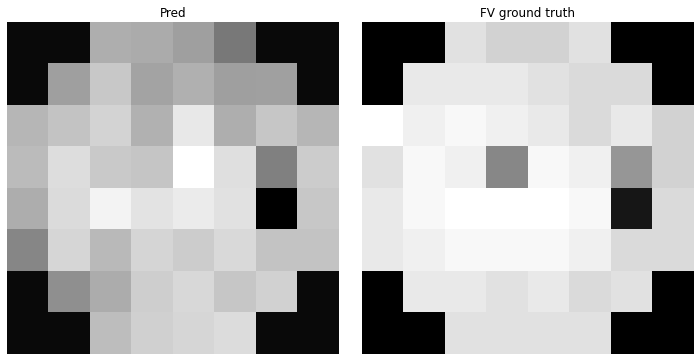

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/5012674_predFV.jpg
31.565948 float32 28 int64
MSE : 11.057321918643527
PSNR: 18.015627800887735
SSIM: -0.014619057716012199
31 28


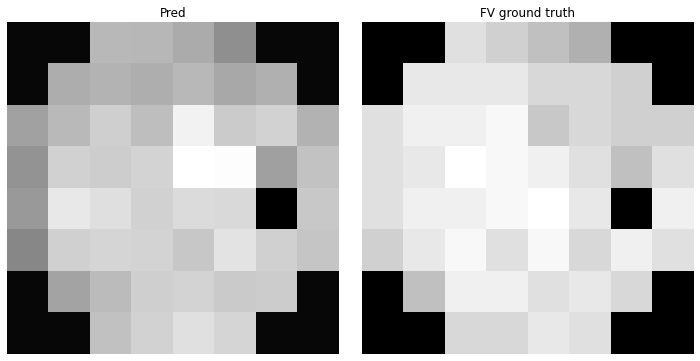

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2907064_L_predFV.jpg
22.548094 float32 26 int64
MSE : 26.752376249401806
PSNR: 33.16280398103548
SSIM: 0.9149288507739853
22 26


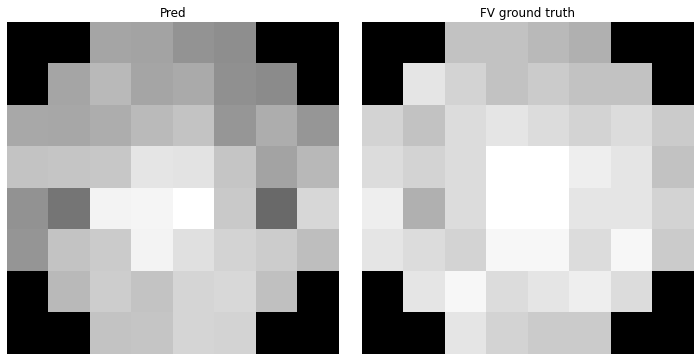

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3310379_predFV.jpg
25.242184 float32 27 int64
MSE : 9.832755593261124
PSNR: 37.44778517152331
SSIM: 0.9550533397238598
25 27


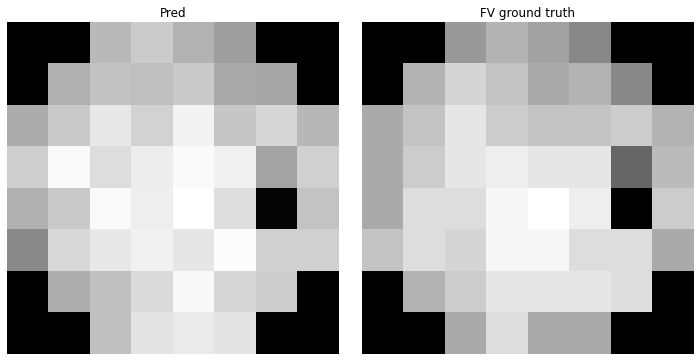

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2815145_L_predFV.jpg
16.424953 float32 13 int64
MSE : 58.78389748060068
PSNR: 29.97253661844993
SSIM: 0.7951688768162335
16 13


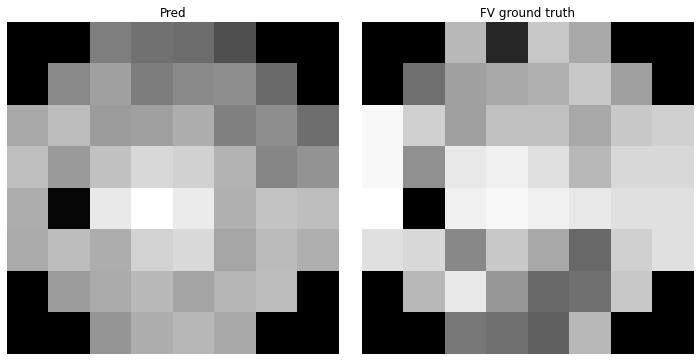

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/0268212_predFV.jpg
23.636406 float32 27 int64
MSE : 36.23390990221204
PSNR: 32.13743227875421
SSIM: 0.8506797476962651
23 27


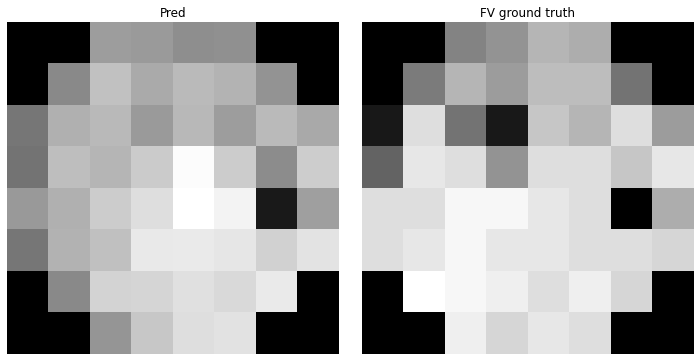

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1935572_predFV.jpg
30.67807 float32 25 int64
MSE : 9.011983088567174
PSNR: 18.02290297094498
SSIM: -0.02063000307105761
30 25


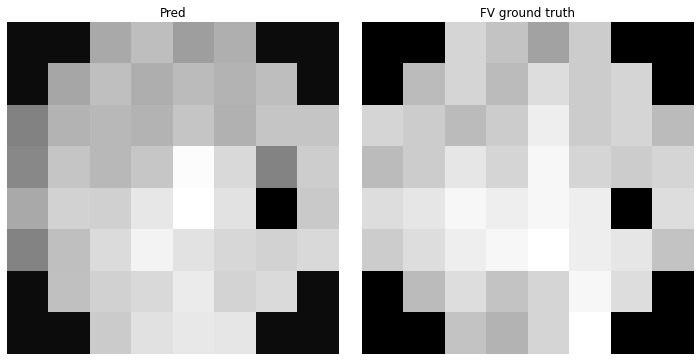

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1310627_R_predFV.jpg
22.990746 float32 25 int64
MSE : 15.045541816626628
PSNR: 35.858365793648474
SSIM: 0.9099633101332526
22 25


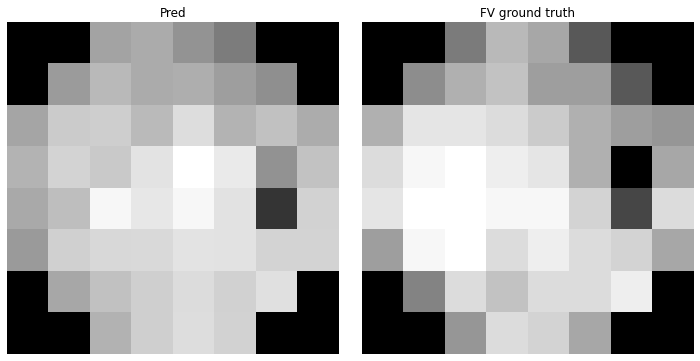

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1342399_L_predFV.jpg
20.881302 float32 24 int64
MSE : 19.461347003948987
PSNR: 34.59994003758303
SSIM: 0.9034960227434661
20 24


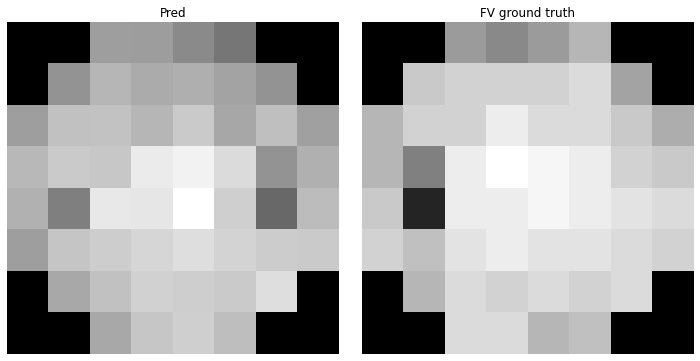

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/4154541_L_predFV.jpg
15.15041 float32 17 int64
MSE : 48.45279117037449
PSNR: 31.504700727521865
SSIM: 0.7441661980508443
15 17


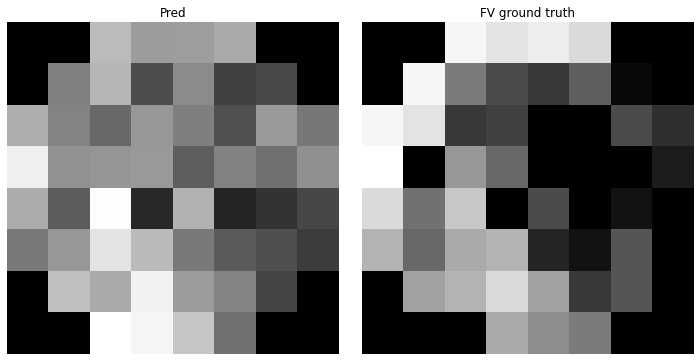

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3407174_predFV.jpg
33.26106 float32 31 int64
MSE : 18.43397373640313
PSNR: 35.7393735606514
SSIM: 0.9270712884305883
33 31


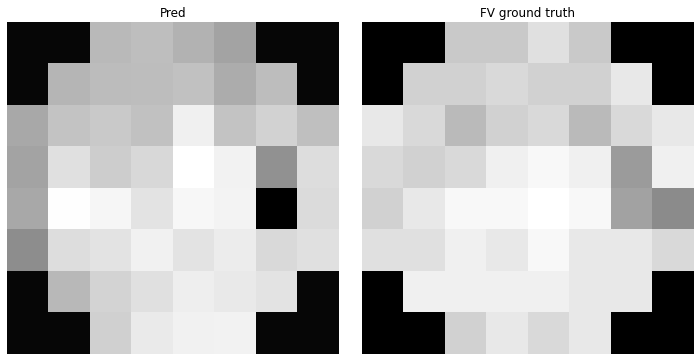

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3806920_predFV.jpg
27.530975 float32 31 int64
MSE : 16.03490337349672
PSNR: 35.52189478806427
SSIM: 0.9453587209081382
27 31


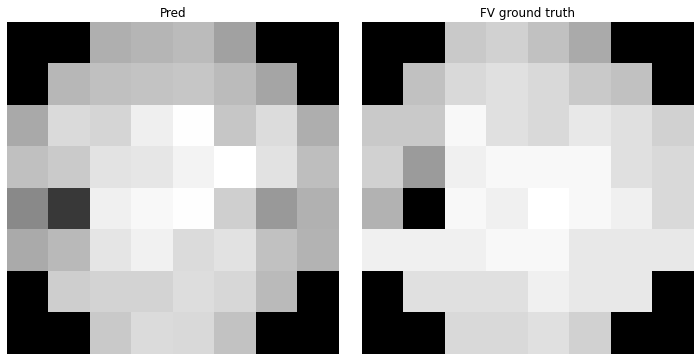

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2987599_predFV.jpg
27.979298 float32 31 int64
MSE : 23.391937744433605
PSNR: 17.986451458359163
SSIM: -0.02598360086489538
27 31


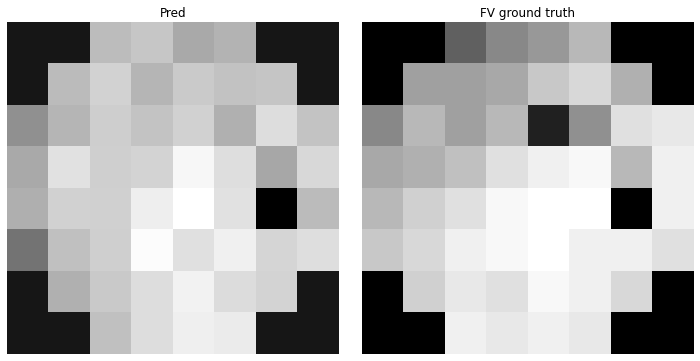

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/0849116_L_predFV.jpg
19.145687 float32 25 int64
MSE : 70.88823765589093
PSNR: 29.21769447680741
SSIM: 0.7814450220298296
19 25


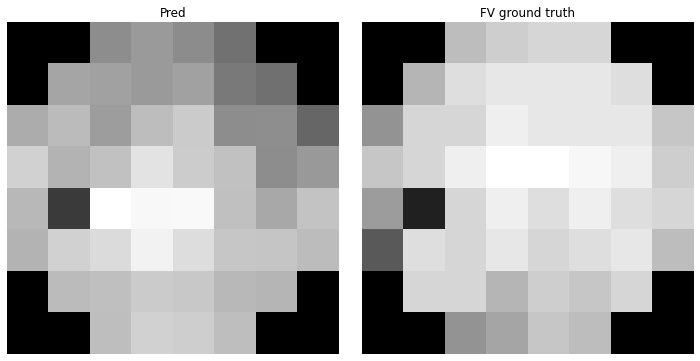

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/4475746_R_predFV.jpg
23.685005 float32 29 int64
MSE : 36.33777810830834
PSNR: 31.90477823354843
SSIM: 0.88058295374778
23 29


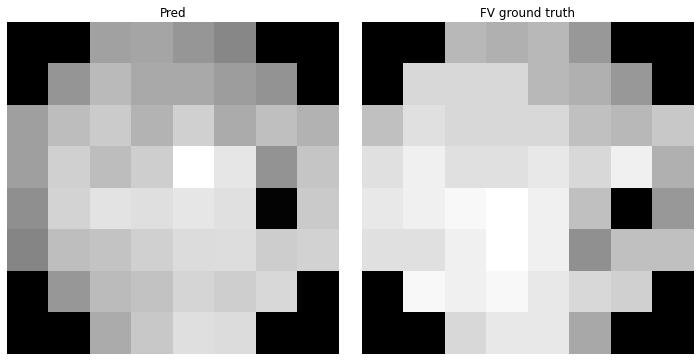

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2216002_predFV.jpg
20.134754 float32 31 int64
MSE : 88.1546748118112
PSNR: 28.244238770372363
SSIM: 0.8211679544071167
20 31


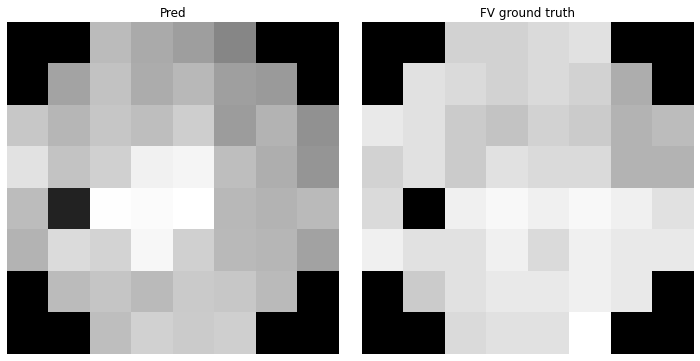

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/4154541_predFV.jpg
29.439465 float32 27 int64
MSE : 172.26096281396974
PSNR: 17.475181508377492
SSIM: 0.036173452159615656
29 27


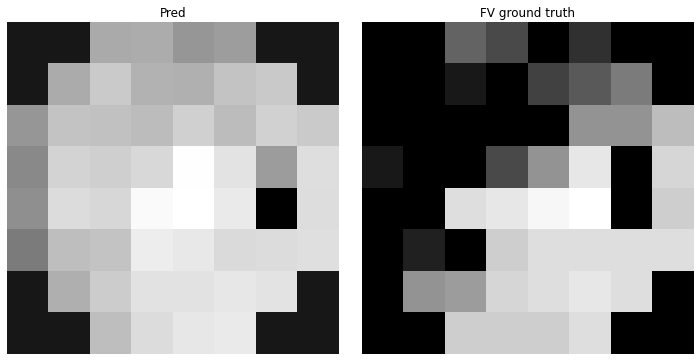

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3321454_L_predFV.jpg
19.485247 float32 15 int64
MSE : 54.60053035091215
PSNR: 30.370832971633885
SSIM: 0.8285127494342117
19 15


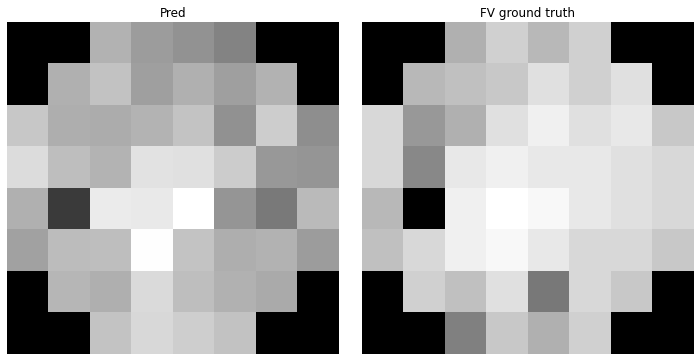

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2815145_predFV.jpg
30.491194 float32 25 int64
MSE : 96.44125110546446
PSNR: 17.849095817418522
SSIM: 0.002122072611473858
30 25


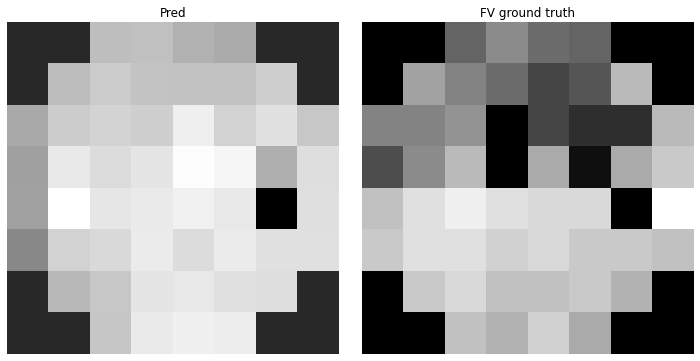

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/2376139_R_predFV.jpg
29.845726 float32 28 int64
MSE : 11.089815319000039
PSNR: 18.052525998444015
SSIM: -0.01225444318718016
29 28


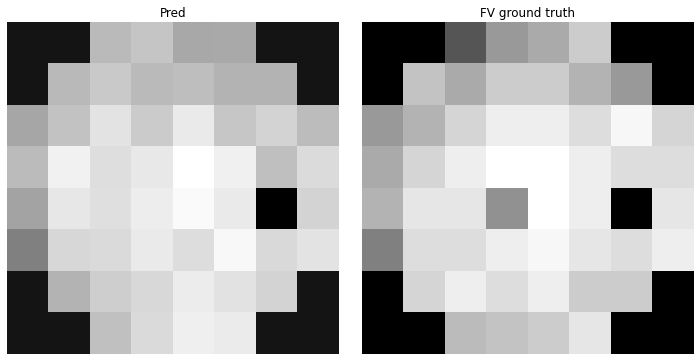

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/3001867_predFV.jpg
29.424831 float32 29 int64
MSE : 8.283962802854862
PSNR: 38.757505701233676
SSIM: 0.9665761526401092
29 29


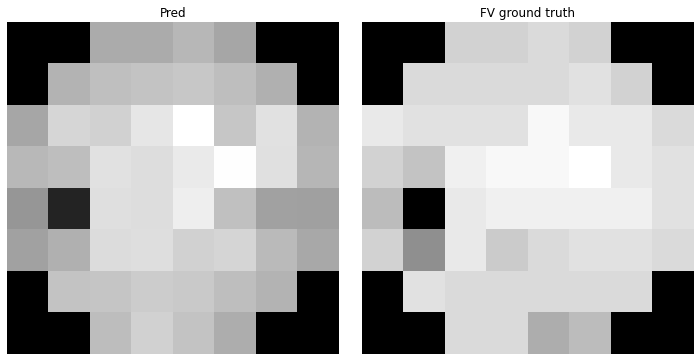

check filename: best_my_model_1006_bs2_p0_e200_FixedShuffle_/1935572_L_predFV.jpg
26.21619 float32 26 int64
MSE : 19.50993476602872
PSNR: 34.6575034555096
SSIM: 0.928270879989549
26 26


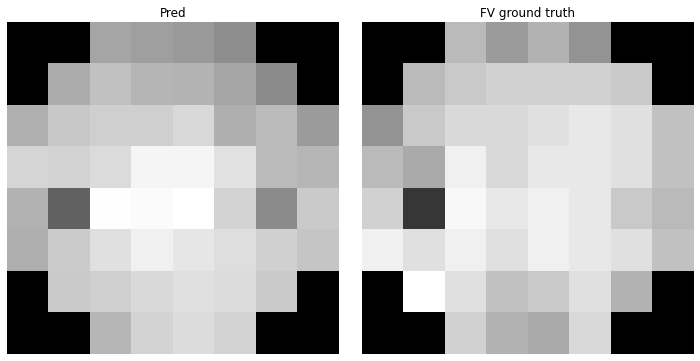

In [34]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error
"""
以MSE越小，則PSNR越大；所以PSNR越大，代表著圖像質量越好。
PSNR高於40dB說明圖像質量極好（即非常接近原始圖像），
在30—40dB通常表示圖像質量是好的（即失真可以察覺但可以接受），
在20—30dB說明圖像質量差；
PSNR低於20dB圖像不可接受

SSIM具有對稱性，即SSIM(x,y)=SSIM(y,x)
SSIM是一個0到1之間的數，越大表示輸出圖像和無失真圖像的差距越小，即圖像質量越好。當兩幅圖像一模一樣時，SSIM=1；

"""

# points_train, points_val
for i in range(len(val_points_dict)): # Also use same val_dict to get the filename and ordering.
    
    # get the filename from val dict
    val_points_dict_list = list(val_points_dict.items())
    fv_img_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_predFV.jpg"
    print("check filename:", fv_img_name)
    fv_metrics_name = best_model.split("/")[0] + "/" + val_points_dict_list[i][0] + "_metrics.txt"
    
    prd_p = reshape_FV_value_list(val_points_pred[i])
    gt_p = reshape_FV_value_list(points_val[i])
    
    #check single vale in the map
    print(prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
    print(f'MSE : {mean_squared_error(prd_p, gt_p)}')
    print(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.uint8), gt_p.astype(np.uint8))}')
    print(f'SSIM: {structural_similarity(prd_p.astype(np.uint8), gt_p.astype(np.uint8), full=False, multichannel=False)}') 
    print(prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4])
    
    # save metrics to _metrics.txt
    with open(fv_metrics_name, "w") as txt_file:
        txt_file.write(f'MSE : {mean_squared_error(prd_p, gt_p)}\n')
        txt_file.write(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.uint8), gt_p.astype(np.uint8))}\n')
        txt_file.write(f'SSIM: {structural_similarity(prd_p.astype(np.uint8), gt_p.astype(np.uint8), full=False, multichannel=False)}\n')
        txt_file.write("\n")
    
    fig, axarr = plt.subplots(1,2,figsize=(10,5))
    axarr[0].imshow(prd_p, interpolation='nearest', cmap="gray")
    axarr[0].set_title("Pred")
    axarr[0].axis('off')

    axarr[1].imshow(gt_p, interpolation='nearest', cmap="gray")
    axarr[1].set_title("FV ground truth")
    axarr[1].axis('off')
   
    fig.tight_layout()    
    plt.savefig(fv_img_name, dpi=150)
    plt.show()

## display pred_FV_value to image

24.998125 float32 30 int64
MSE : 54.237833886505655
PSNR: 30.35268535653481
SSIM: 0.8509139016776216
24 30


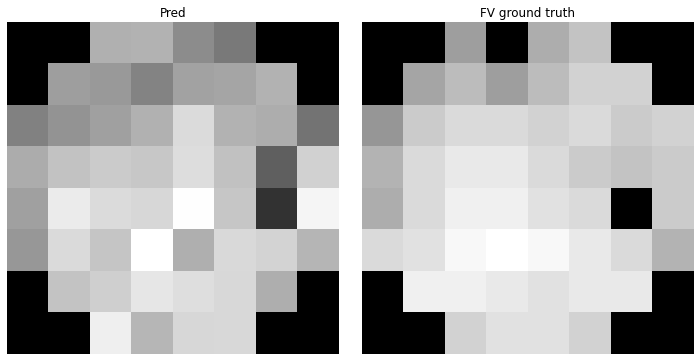

19.967283 float32 28 int64
MSE : 62.05243774488357
PSNR: 29.768947540068243
SSIM: 0.8345716400795417
19 28


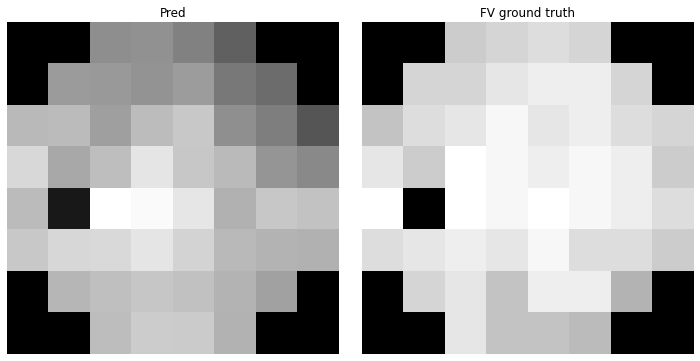

30.67807 float32 25 int64
MSE : 9.011983088567174
PSNR: 18.02290297094498
SSIM: -0.02063000307105761
30 25


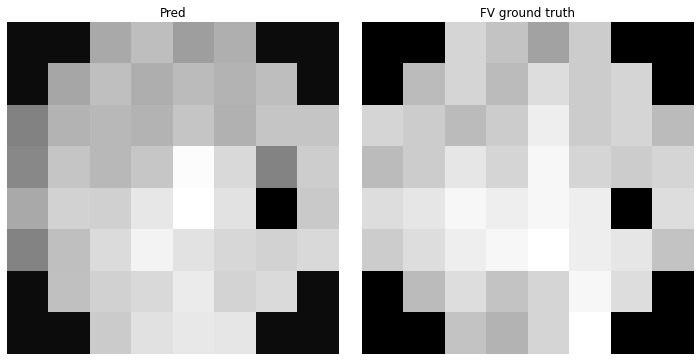

23.222912 float32 23 int64
MSE : 39.76174782068872
PSNR: 32.067997874218364
SSIM: 0.7835412725608907
23 23


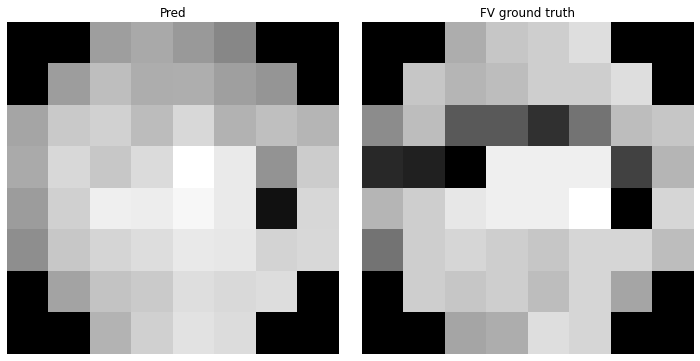

21.465437 float32 29 int64
MSE : 66.66480033516041
PSNR: 29.423839028786603
SSIM: 0.8386514579003874
21 29


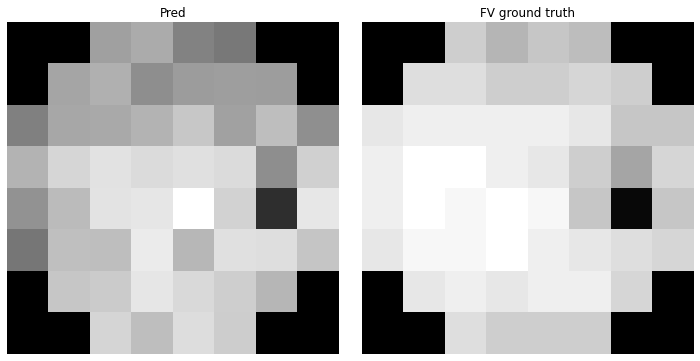

20.919937 float32 29 int64
MSE : 44.2567962615353
PSNR: 31.20536364103893
SSIM: 0.8510936336986873
20 29


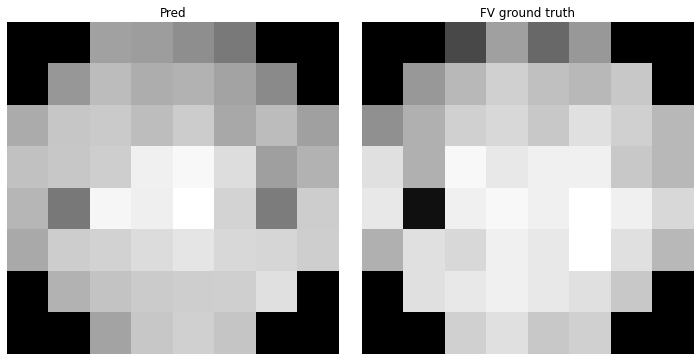

38.159042 float32 29 int64
MSE : 26.313399110190304
PSNR: 18.23102457944883
SSIM: -0.007320414397036995
38 29


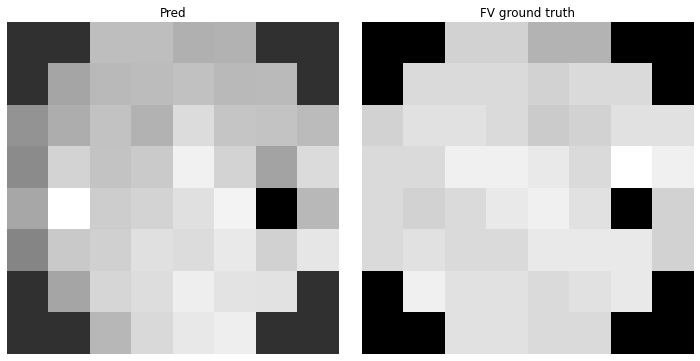

28.208393 float32 29 int64
MSE : 38.06778318675755
PSNR: 31.8870156532904
SSIM: 0.8705337795182251
28 29


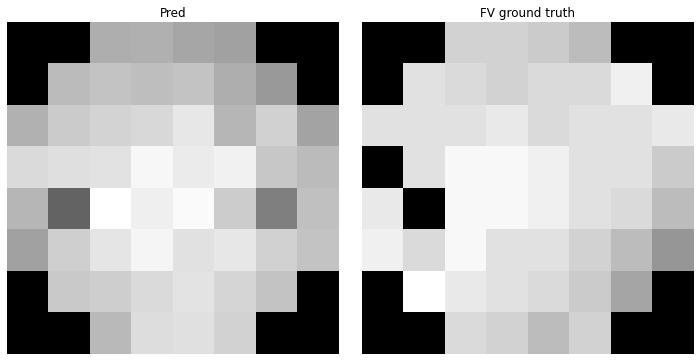

27.48661 float32 24 int64
MSE : 93.03506925527081
PSNR: 28.744199380664185
SSIM: 0.7258759771309551
27 24


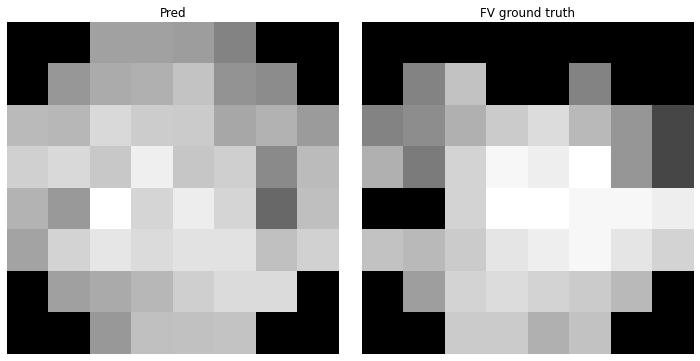

32.31259 float32 28 int64
MSE : 26.822563360788138
PSNR: 17.94880639841018
SSIM: -0.0177830445174019
32 28


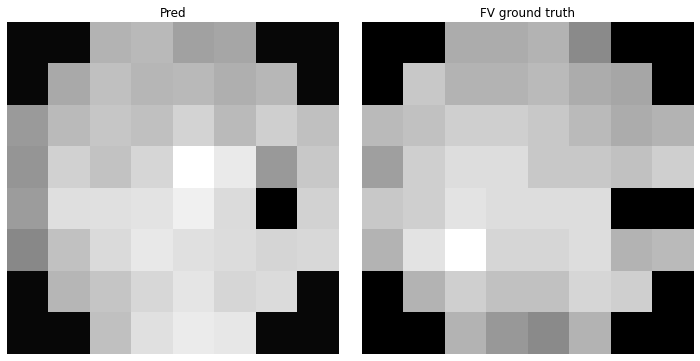

20.340866 float32 24 int64
MSE : 95.37652507071144
PSNR: 28.420510767061128
SSIM: 0.5940200744097528
20 24


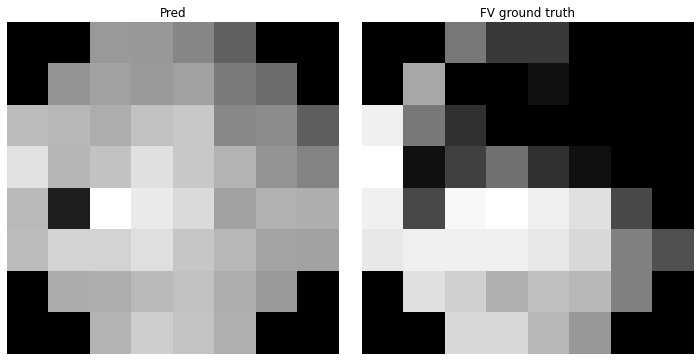

23.831047 float32 23 int64
MSE : 58.52660952834715
PSNR: 30.47318699777335
SSIM: 0.7310367981404328
23 23


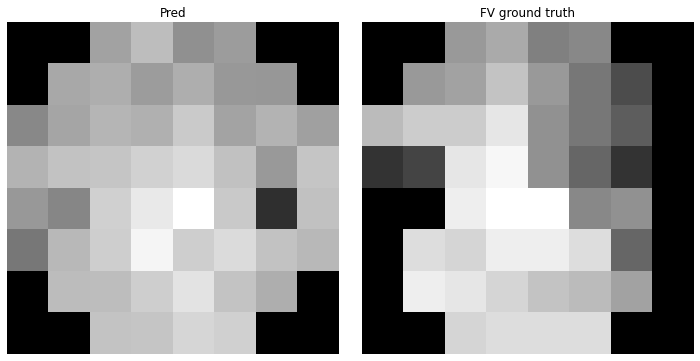

30.491194 float32 25 int64
MSE : 96.44125110546446
PSNR: 17.849095817418522
SSIM: 0.002122072611473858
30 25


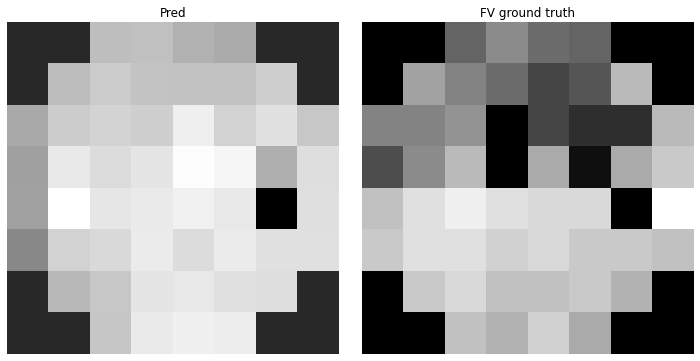

21.495789 float32 28 int64
MSE : 61.93132978823961
PSNR: 30.29645794220531
SSIM: 0.7285031672037525
21 28


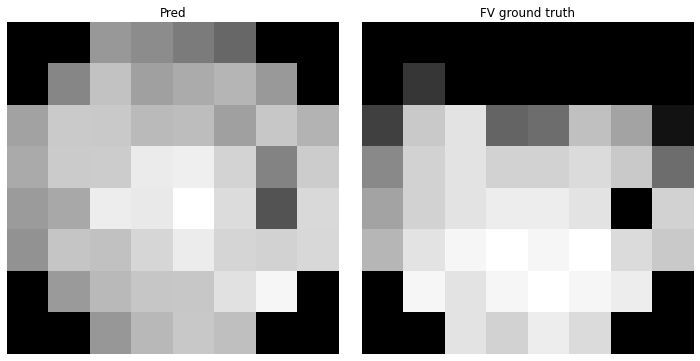

29.359753 float32 30 int64
MSE : 25.072548638164164
PSNR: 17.98789578032825
SSIM: -0.016390919114845443
29 30


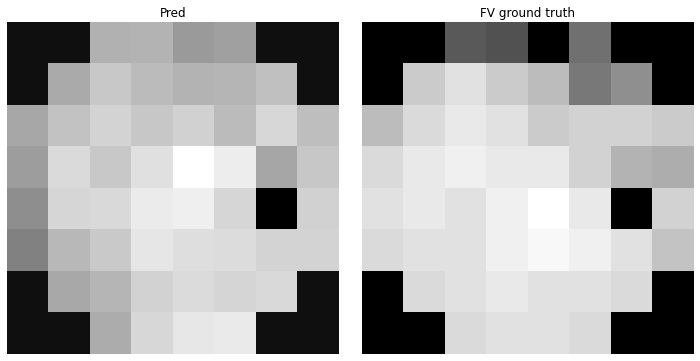

27.567871 float32 28 int64
MSE : 20.69198511334355
PSNR: 34.540160087264866
SSIM: 0.9253128709696594
27 28


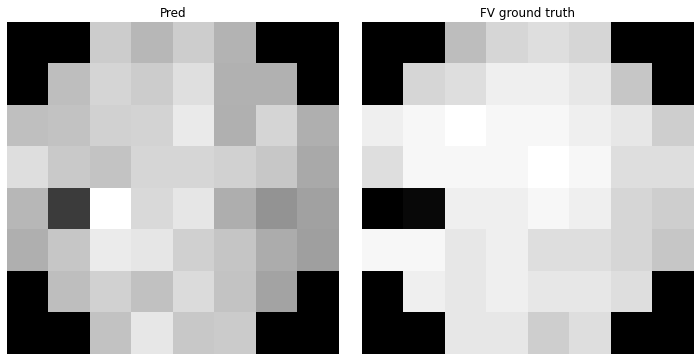

20.472637 float32 9 int64
MSE : 69.58417558409354
PSNR: 29.91894478259065
SSIM: 0.6566808158743948
20 9


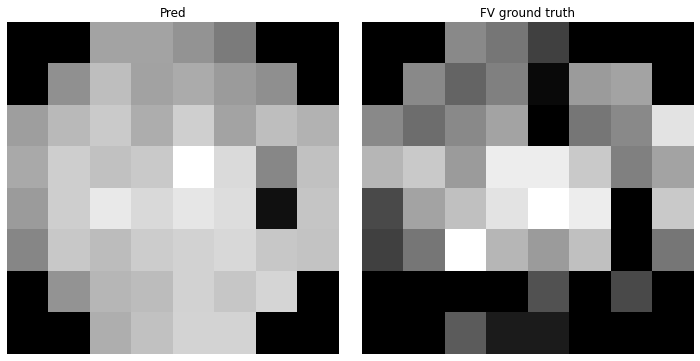

24.85817 float32 30 int64
MSE : 113.33287084064936
PSNR: 27.670854304314943
SSIM: 0.5767102754479266
24 30


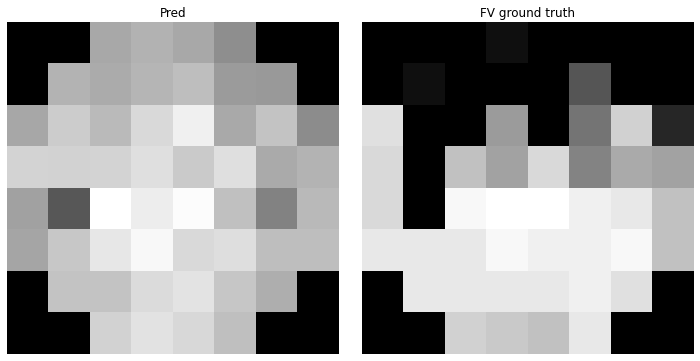

20.089405 float32 5 int64
MSE : 171.03682132490076
PSNR: 26.071827353207823
SSIM: 0.37119658038839515
20 5


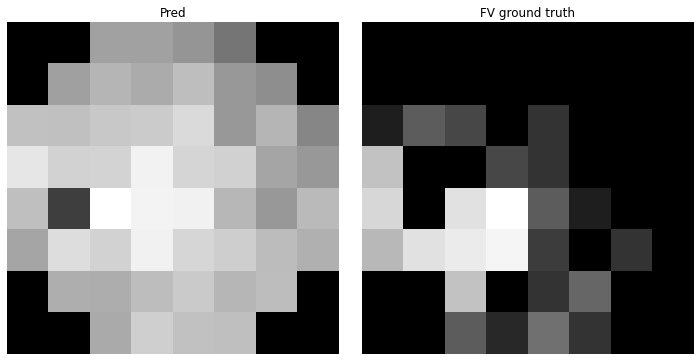

23.327415 float32 29 int64
MSE : 35.87565375635906
PSNR: 31.97327521573289
SSIM: 0.8985034551679294
23 29


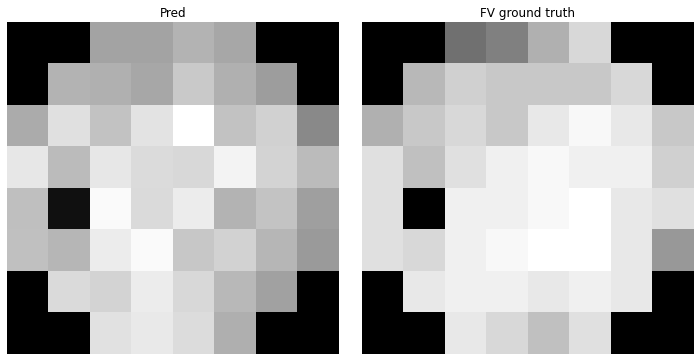

22.997433 float32 29 int64
MSE : 49.91830097816546
PSNR: 30.663488846352887
SSIM: 0.8695330097973568
22 29


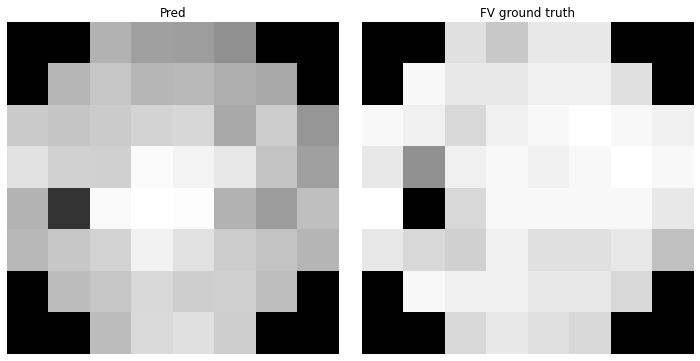

30.574772 float32 24 int64
MSE : 65.8941181983973
PSNR: 30.172003435238352
SSIM: 0.7803149302005282
30 24


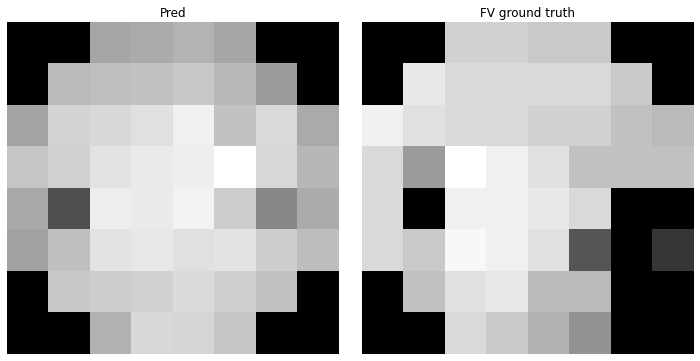

24.308384 float32 24 int64
MSE : 116.42219913226815
PSNR: 27.710712178603988
SSIM: 0.5737290531157418
24 24


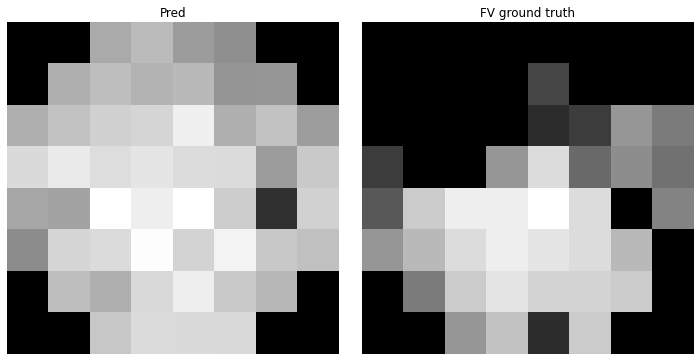

22.789326 float32 27 int64
MSE : 32.871941427090704
PSNR: 18.008430770220695
SSIM: -0.03467612625019552
22 27


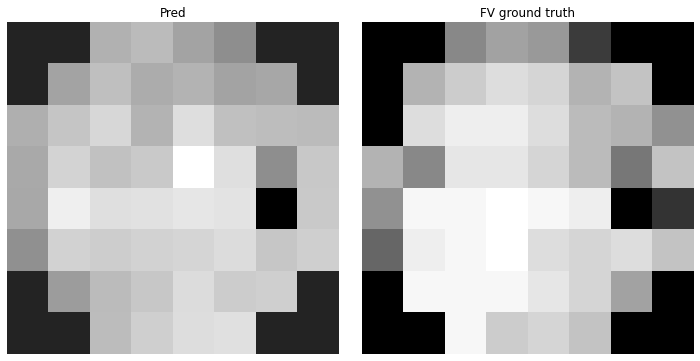

29.424942 float32 25 int64
MSE : 35.965456986731276
PSNR: 32.37243292276929
SSIM: 0.8458164271306314
29 25


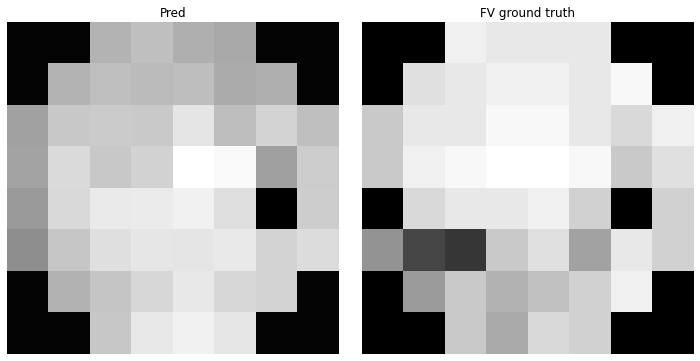

30.06451 float32 16 int64
MSE : 244.47115928741135
PSNR: 17.163984123350176
SSIM: 0.027336315384194593
30 16


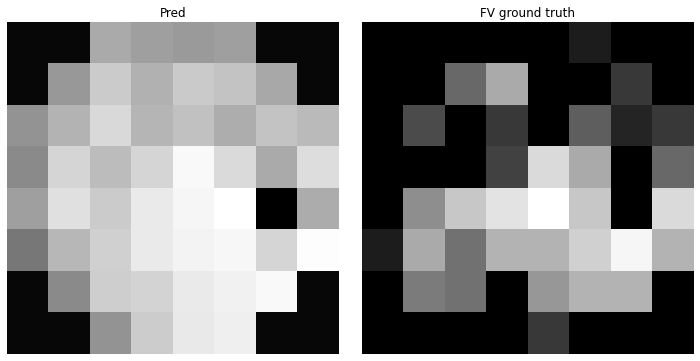

19.293358 float32 0 int64
MSE : 212.9543074306976
PSNR: 25.090748074406356
SSIM: 0.16661497177993795
19 0


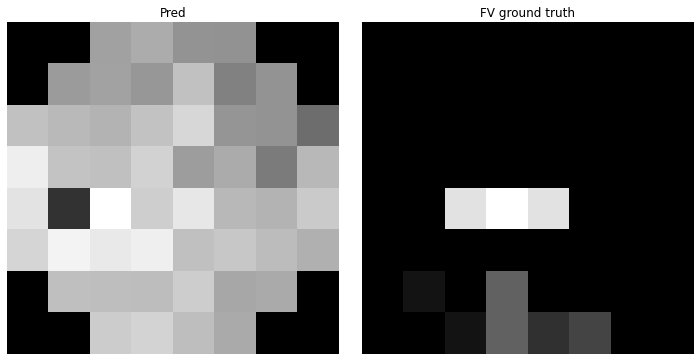

22.716738 float32 15 int64
MSE : 101.00154283699713
PSNR: 28.073503544316985
SSIM: 0.539897880642462
22 15


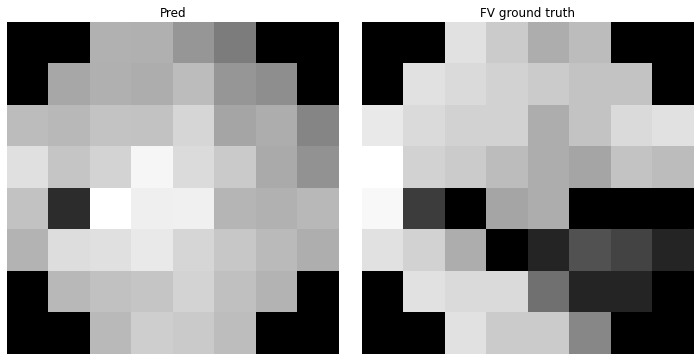

In [100]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error
"""
以MSE越小，則PSNR越大；所以PSNR越大，代表著圖像質量越好。
PSNR高於40dB說明圖像質量極好（即非常接近原始圖像），
在30—40dB通常表示圖像質量是好的（即失真可以察覺但可以接受），
在20—30dB說明圖像質量差；
PSNR低於20dB圖像不可接受

SSIM具有對稱性，即SSIM(x,y)=SSIM(y,x)
SSIM是一個0到1之間的數，越大表示輸出圖像和無失真圖像的差距越小，即圖像質量越好。當兩幅圖像一模一樣時，SSIM=1；

"""

# points_train, points_val
for i in range(len(points_val)):
    prd_p = reshape_FV_value_list(val_points_pred[i])
    gt_p = reshape_FV_value_list(points_val[i])
    
    #check single vale in the map
    print(prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
    print(f'MSE : {mean_squared_error(prd_p, gt_p)}')
    print(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.uint8), gt_p.astype(np.uint8))}')
    print(f'SSIM: {structural_similarity(prd_p.astype(np.uint8), gt_p.astype(np.uint8), full=False, multichannel=False)}')
    print(prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4])
    
    fig, axarr = plt.subplots(1,2,figsize=(10,5))
    axarr[0].imshow(prd_p, interpolation='nearest', cmap="gray")
    axarr[0].set_title("Pred")
    axarr[0].axis('off')

    axarr[1].imshow(gt_p, interpolation='nearest', cmap="gray")
    axarr[1].set_title("FV ground truth")
    axarr[1].axis('off')
   
    fig.tight_layout()
    plt.show()
    

In [ ]:
640/8

In [ ]:
val_zero = np.zeros((640,640))

In [ ]:
val_zero.shape

In [ ]:
val_zero = np.zeros((52,52))

In [ ]:
val_zero.shape

In [ ]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:
val_zero[:,:] = points_val[0]

In [ ]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [ ]:
points_val[0][:]

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [ ]:
mape(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mape(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mae = tf.keras.losses.MeanAbsoluteError()

In [ ]:
mae(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mae(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mse = tf.keras.losses.MeanSquaredError()

In [ ]:
mse(points_val[0], val_points_pred[0]).numpy()

In [ ]:
mse(points_val[1], val_points_pred[1]).numpy()

In [ ]:
mse([1], [3]).numpy()

### Visualize results (org keypoing plot)

Now visualize neural network results on several images from validation sample. Make sure that your network outputs different points for images (i.e. it doesn't output some constant).

In [ ]:
val_points_pred = model.predict(imgs_val)

In [ ]:
print(val_points_pred.shape)

In [ ]:
for i in range(11,15):
    visualize_points(imgs_val[i], val_points_pred[i])

Conclusion

The facial keypoints regression works quite well as seen above. Final MSE on Validation set ~ 0.013.

Due to my computational limitations, I trained the regressor on 50x50 images instead of 100x100 images. I also had to read half the dataset, train the NN, save the weights, and then train the other half. (Otherwise there was a MemoryError). This explains the extremely low loss that can be seen in the output of the model.fit. 